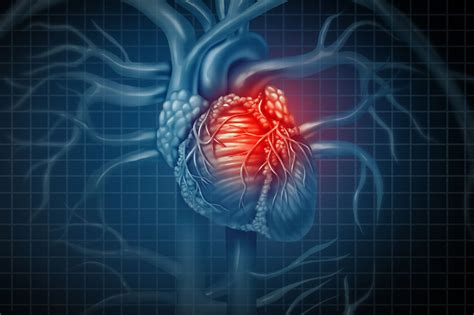
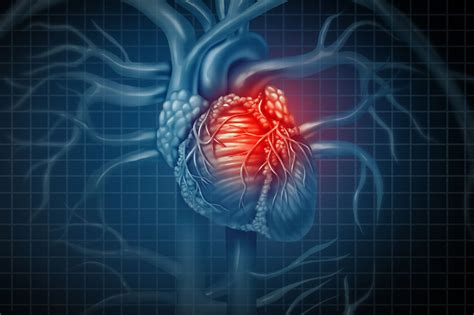

# **I. Importing libraries and data**

In [ ]:
#imports for data analysis and wrangling
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning

#Train_test_split
from sklearn.model_selection import train_test_split

#scaling
from sklearn.preprocessing import RobustScaler

#models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#accuracy score
from sklearn.metrics import accuracy_score

#confusion matrix and classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Importing data
heart = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')


# **II. Analyze by describing the data**

In [ ]:
#Getting all the features
print("The column names of the dataframe are the following in this list:", heart.columns.values)
print("------------------------------------")

#Getting the number of rows and columns of the table
print("The shape of the dataframe is, ", heart.shape)
print("------------------------------------")

#Checking for null values
print(heart.isnull().sum())
print("------------------------------------")

#Examining the data types of various features
print(heart.info())
print("------------------------------------")

In [ ]:
#Exxamining the first 5 observations
display(heart.head())
#Examining the last 5 ibservations
display(heart.tail())
#Summary statistics of the features
display(heart.describe())

# **III. Preparing the data**

**A. Changing the considered null values to the most common occurrence**


As stated in https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843 caa and thall have null values. We will change the null values by the most common occurrence in caa and thall.

In [ ]:
#Checking the most common occurrence in caa
sns.countplot(x = "caa", data = heart)
plt.show()

In [ ]:
#Replacing 4(null) to 0 (most common occurrence)
heart['caa'] = heart['caa'].replace({4:0})

#New set of observations in caa
sns.countplot(x = "caa", data = heart)
plt.show()

In [ ]:
#Checking the most common occurrence in thall
sns.countplot(x = "thall", data = heart)

plt.show()

In [ ]:
#Replacing 9(null) to 2 (most common occurrence)
heart['thall'] = heart['thall'].replace({0:2})

#New set of observations in thall
sns.countplot(x = "thall", data = heart)
plt.show()

**B. Changing categorical variables to category data types**

This can be helpful in speeding up our code. Here, we will change the datatype of categorical variables in the heart dataframe that are currently numerical or character datatypes to categorical datatypes.

In [ ]:
# heart dataframe

#list of categorical variables
categorical = ["sex","exng","caa","cp","fbs","restecg","slp","thall"]
#Old information of the datatypes in heart dataframe
print(heart[categorical].dtypes)
print("____________________")
#Converting to categorical datatypes
heart[categorical] = heart[categorical].apply(lambda x: x.astype('category'), axis = 0)
#New information of the datatypes in heart dataframe
print(heart[categorical].dtypes)


**C. Changing the values of heart dataset for visualizing purposes**
Values used in this data is based on this:
https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843


In [ ]:
#Changing the values of heart for visual purposes
heart['sex'] = heart['sex'].replace({0:'Female', 1:'Male'})
heart['cp'] = heart['cp'].replace({0:"Asymptomatic",1:'Typical Angina', 
                                   2:'Atypical Angina', 3: "Non-Anginal Pain"})
heart['fbs'] = heart['fbs'].replace({0:"False", 1:"True"})
heart['restecg'] = heart['restecg'].replace({0: "Hypertrophy",1:"Normal", 
                                             2:"ST-T Wave Abnormality"})
heart['exng'] = heart['exng'].replace({0:"No", 1:"Yes"})
heart['slp'] = heart['slp'].replace({0: "downsloping", 1: "flat", 2: "upsloping"})
heart['thall'] = heart['thall'].replace({1:"Fixed Defect", 2: "Normal", 3:"Reversible Defect"})
heart["output"] = heart["output"].replace({0:"Not Prone", 1: "Prone to Having a Heart Disease"})

#Viewing heart dataframe
display(heart.head())

**D. Creating functions to be used for EDA**

I created a function based on the visualizations on this notebook. Please also visit this one.
https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy

**1. Function for setting up the plotting space, creating a title in the upper left, and creates at most 8 axes**

In [ ]:
def setup(title,axnum):
    """ Creates a plotting space for at most 8 subplots including a title on the upper left
    Args:
        title: The title of your plotting space
        axnum: The number of axes in your plotting space"""
    
    #Setting up the plotting space
    fig = plt.figure(figsize=(18,15))
    gs = fig.add_gridspec(3,3)
    gs.update(wspace=0.5, hspace=0.25)
    ax0 = fig.add_subplot(gs[0,0])

    # Title of the plot 
    ax0.spines["bottom"].set_visible(False)
    ax0.spines["left"].set_visible(False)
    ax0.spines["top"].set_visible(False)
    ax0.spines["right"].set_visible(False)
    ax0.tick_params(left=False, bottom=False)
    ax0.set_xticklabels([])
    ax0.set_yticklabels([])
    ax0.text(0.5,0.5,
          title,
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20, fontweight='bold',
         fontfamily='monospace',
         color="#ffffff")
    ax0.set_facecolor("#000000")
    # overall background color
    fig.patch.set_facecolor("#000000") 
    
    if axnum is 1:
        global ax1
        ax1 = fig.add_subplot(gs[0,1])
    if axnum is 2:
        global ax2
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
    if axnum is 3:
        global ax3
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
    if axnum is 4:
        global ax4
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
    if axnum is 5:
        global ax5
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2]) 
    if axnum is 6:
        global ax6
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
    if axnum is 7:
        global ax7
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
        ax7 = fig.add_subplot(gs[2,1])
    if axnum is 8:
        global ax8
        ax1 = fig.add_subplot(gs[0,1])
        ax2 = fig.add_subplot(gs[0,2])
        ax3 = fig.add_subplot(gs[1,0])
        ax4 = fig.add_subplot(gs[1,1])
        ax5 = fig.add_subplot(gs[1,2])
        ax6 = fig.add_subplot(gs[2,0])
        ax7 = fig.add_subplot(gs[2,1])
        ax8 = fig.add_subplot(gs[2,2])
        


**2. Function for creating seaborn subplots**

In [ ]:
def plot(ax,sns,var1,var2,x,y,title):
    """ Creates a seaborn subplot based on the axes it was assigned to.
    Args:
        ax: The ax where the data will be plotted
        sns: Type of seaborn plot to be used
        var1: X variable to be considered in the seaborn plot
        var2: Y variable to be considered in the seaborn plot
        x: x-coordinate of the placement of the title in the plotting space
        y: y-coordinate of the placement of the title in the plotting space
        title: title of the subplot"""
    ax.text(x,y,title, fontsize=14, fontweight='bold', fontfamily='monospace', color="#ffffff")
    ax.grid(color='#ffffff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns(ax=ax,x = var1, y = var2, data=heart,hue = 'output',palette=["#ff6961","#aec6cf"])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines[["top","right","left"]].set_visible(False) # removes the square margins in the graph
    ax.set_facecolor("#000000") #background color of the graph
    
    #Changing the color of x ticks and y ticks
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

# **IV. Analyze by visualizing data**

**A. EDA of Categorical Variables with Respect to the Target Variable**

In [ ]:
setup('Who is prone to heart attack?\n (Countplot of categorical features) \n_________________',8)

#Count plots
plot(ax1,sns.countplot,'sex',None,0.3,120,'Sex')
plot(ax2,sns.countplot,'exng',None,-0.3,150, 'Exercise Induced Angina (exng)')
plot(ax3,sns.countplot,'caa',None,-0.5,150, 'Number of Major Vessels (caa)')
plot(ax4,sns.countplot,'thall',None,-1,145, 'Condition of Blood Flow in the Heart (thall)')
plot(ax5,sns.countplot,'fbs',None,-0.75,160,'Fasting Blood Sugar > 120 mg/dl (fbs)')
plot(ax6,sns.countplot,'restecg',None,-1,105,'Resting Electrocardiographic Results (restecg)')
plot(ax7,sns.countplot,'slp',None,-0.75,118, 'Slope of the Peak Exercise ST Segement (slp)')
plot(ax8,sns.countplot,'cp',None,0.5,115, 'Chest Pain Type')

#Rotating the xlabels on ax8
ax8.tick_params(axis='x', rotation=90)

Insights in these categorical variables can be seen in the stripplots below

**B. EDA of Numerical Variables with Respect to the Target Variable**

In [ ]:
setup('Who is prone to heart attack?\n (KDE plot of continuous features) \n_________________',5)

#Kde plots
plot(ax1,sns.kdeplot,'age',None,30,0.027,'Age in Years (age)')
plot(ax2,sns.kdeplot,'trtbps',None,80,0.014,'Resting Blood Pressure (trtbps)')
plot(ax3,sns.kdeplot,'chol',None,100,0.005,'Serum Cholestoral in mg/df (chol)')
plot(ax4,sns.kdeplot,'thalachh',None,50,0.0125,'Maximum Heart Rate Achieved (thalachh)')
plot(ax5,sns.kdeplot,'oldpeak',None,-2,0.45,'ST Depression Induced by Exercise Relative to Rest (oldpeak)')



**Insights:**

1. **Older people** are **less prone** to heart disease
2. **Increase of maximum heart rate** can also increase the likelihood of being prone to heart disease
3. **0 oldpeak** is very likely to be prone to heart disease.

**C. Multivariate Analysis of Categorical Variables with Respect to Age**


In [ ]:
setup('What age am I prone to heart attack?\n (Stripplot of categorical features)\n_________________',8)

#Count plots
plot(ax1,sns.stripplot,'sex','age',0.3,80,'Sex')
plot(ax2,sns.stripplot,'exng','age',-0.5,80, 'Exercise Induced Angina (exng)')
plot(ax3,sns.stripplot,'caa','age',-0.5,80, 'Number of Major Vessels (caa)')
plot(ax4,sns.stripplot,'thall','age',-1,80, 'Condition of Blood Flow in the Heart (thall)')
plot(ax5,sns.stripplot,'fbs','age',-0.75,80,'Fasting Blood Sugar > 120 mg/dl (fbs)')
plot(ax6,sns.stripplot,'restecg','age',-1,80,'Resting Electrocardiographic Results (restecg)')
plot(ax7,sns.stripplot,'slp','age',-0.75,80, 'Slope of the Peak Exercise ST Segement (slp)')
plot(ax8,sns.stripplot,'cp','age',0,80, 'Chest Pain Type (cp)')

#Rotating the xlabels on ax8
ax8.tick_params(axis='x', rotation=90)

**Insights**
1. A huge number of **old males** are **NOT** prone to heart disease.
2. There are **more females** who are prone to heart disease compared to males regardless of their age.
3. People who **do NOT have exercise induced angina** is more prone to have a heart disease.
4. People **who have major vessels** are **less prone** to heart disease.
5. People who have **normal blood flow** in the heart are more prone to have a heart disease.
6. A **flat** slope peak exercise ST segment is **less prone** to a heart disease
7. People who have **asymptomatic** chest pain are **less prone** to heart disease.

# **V. Modelling**

**1. Returning the categorical features of heart to numerical datatypes for machine learning purposes**

In [ ]:
#Returning the values of heart for machine learning purposes
heart['sex'] = heart['sex'].replace({"Female":0, 'Male':1})
heart['cp'] = heart['cp'].replace({"Asymptomatic":0, "Typical Angina":1, 
                                   "Atypical Angina":2, "Non-Anginal Pain":3})
heart['fbs'] = heart['fbs'].replace({"False":0, "True":1})
heart['restecg'] = heart['restecg'].replace({"Hypertrophy":0, "Normal":1, "ST-T Wave Abnormality":2})
heart['exng'] = heart['exng'].replace({"No":0, "Yes":1})
heart['slp'] = heart['slp'].replace({"downsloping":0, "flat":1, "upsloping":2})
heart['thall'] = heart['thall'].replace({"Fixed Defect":1, "Normal":2, "Reversible Defect":3})
heart['output'] = heart['output'].replace({"Not Prone":0, "Prone to Having a Heart Disease":1})

#Viewing heart dataframe
display(heart.head())

**2. Extracting features and the target variable**

In [ ]:
#Extracting the features of the testing and training data
X,y = heart.iloc[:,0:-1] , heart.iloc[:,-1]
print("The first five rows of the features of the data are")
display(X.head())
print("The first five observations of the target variable are")
display(y.head())

**3. Getting the training data and testing data**

In [ ]:

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

**4. Scaling the training and testing data of features**

Documentation of RobustScaler() 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**5. Instantiating different models**

In [ ]:
lr = LogisticRegression(random_state = 24)
knn =  KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 24)
rf = RandomForestClassifier(n_estimators=200,
            random_state=24)
svc = SVC()

#list of classifiers
models =     [("Random Forest",rf),
              ("SVM",svc),
              ("Logistic Regression",lr),
              ("K Nearest Neighbors",knn),
              ("Classification Tree", dt)]


**6. Accuracy, confusion matrix, and classification report**

In [ ]:
for model_name, model in models:
    #fit clf to the training set
    model.fit(X_train, y_train)
    #predict the labels of the test set
    y_pred = model.predict(X_test)
    #Evaluate accuracy of the clf on the test set
    print('The accuracy of {:s} is : {:.3f}'.format(model_name, accuracy_score(y_test,y_pred)))
    # Confusion matrix
    print(confusion_matrix(y_test, y_pred))
    #Classification report
    print(classification_report(y_test, y_pred))

**If you forgot the numbers you can see above, just recall:**
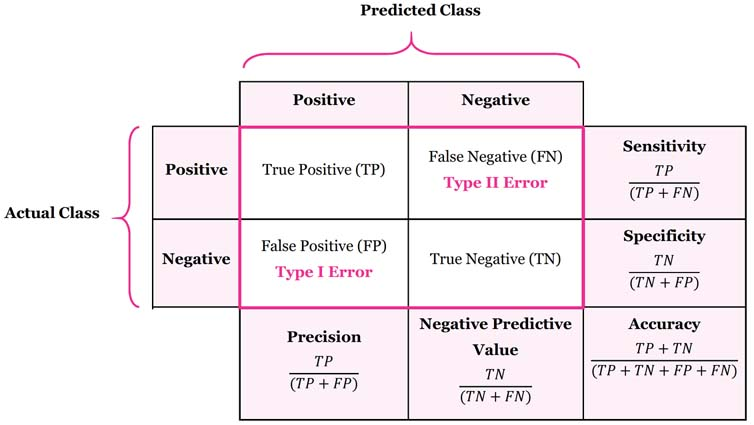

**IF YOU LIKED THIS NOTEBOOK PLEASE GIVE AN UPVOTE!**

**ALSO, COMMENTS, SUGGESTIONS, AND RECOMMENDATIONS ARE HIGHLY APPRECIATED!**